Outlier treatment


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train_ctrUa4K.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data_copy = data.copy()
data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(data_copy.shape)
data_copy.dropna(inplace =  True)
data_copy.shape

(614, 13)


(480, 13)

In [5]:
data_copy.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
data_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data_copy.replace(('Rural', 'Semiurban', 'Urban'), (1, 2,3), inplace = True)
data_copy.replace(('Yes', 'No'), (1, 0), inplace = True)
data_copy.replace(('Y', 'N'), (1,0), inplace = True)
data_copy.replace(('Graduate', 'Not Graduate'), (1,0), inplace = True)
data_copy.replace(('Male', 'Female'), (1,0), inplace = True)
data_copy['Dependents'] = np.where((data_copy.Dependents == '3+'), int('4'), data_copy.Dependents)
data_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,3,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,3,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,3,1


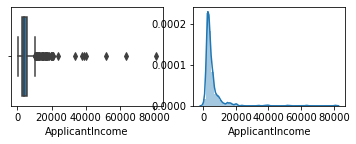

In [8]:
plt.subplot(2,2,1)
sns.boxplot(data['ApplicantIncome'])
plt.subplot(2,2,2)
sns.distplot(data['ApplicantIncome'])

#Applying log10 method for positively skewed data

In [9]:
data_copy['ApplicantIncome'] = np.log10(data_copy['ApplicantIncome'])
#data_copy['CoapplicantIncome'] = np.log10(data_copy['CoapplicantIncome'])

data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,3.661150,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3.477121,0.0,66.0,360.0,1.0,3,1
3,LP001006,1,1,0,0,0,3.412124,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1,0,0,1,0,3.778151,0.0,141.0,360.0,1.0,3,1
5,LP001011,1,1,2,1,1,3.733759,4196.0,267.0,360.0,1.0,3,1


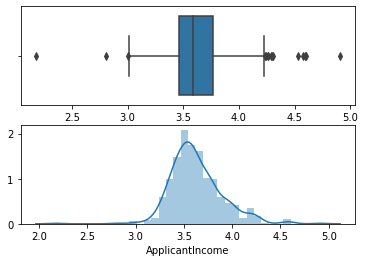

In [10]:
plt.subplot(2,1,1)
sns.boxplot(data_copy['ApplicantIncome'])
plt.subplot(2,1,2)
sns.distplot(data_copy['ApplicantIncome'])

In [11]:
X = data_copy[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = data_copy[['Loan_Status']]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
481,1,1,4,0,0,3.490661,0.0,113.0,360.0,1.0,1
341,0,0,0,1,0,3.376212,0.0,46.0,360.0,1.0,1
297,0,1,1,1,0,3.668945,0.0,135.0,360.0,1.0,3
255,0,0,4,1,0,3.488974,0.0,255.0,360.0,1.0,1
271,1,1,0,1,0,4.047119,0.0,136.0,360.0,1.0,3


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
predictions

c:\users\suraj jadhav\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\suraj jadhav\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [13]:
accuracy = logreg.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, predictions)
print("Accuracy by logistic regression is", logreg_accuracy)
print("Accuracy by logistic regression is", accuracy)

Accuracy by logistic regression is 0.7708333333333334
Accuracy by logistic regression is 0.7708333333333334


##Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree accuracy is  ", decision_tree_accuracy)
accuracy_dt = decision_tree.score(X_test, y_test)
print("Decision Tree accuracy is  ", accuracy_dt)

Decision Tree accuracy is   0.65625
Decision Tree accuracy is   0.65625


Adaboost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_accuracy = adaboost.score(X_test, y_test)
print("AdaBoost Accuracy is ", adaboost_accuracy)

AdaBoost Accuracy is  0.7083333333333334


c:\users\suraj jadhav\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoost

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_accuracy = gbc.score(X_test, y_test)
print("GradientBoostingClassifier acuracy is ", gbc_accuracy)

GradientBoostingClassifier acuracy is  0.71875


c:\users\suraj jadhav\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
ranfor_accuracy = ranfor.score(X_test, y_test)
print("RandomForest Accuracy is ", ranfor_accuracy)

<ipython-input-17-99a2b8aef58b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranfor.fit(X_train, y_train)


RandomForest Accuracy is  0.7604166666666666
